# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')
from tensorflow import keras
from keras.layers import Dense,Dropout,Input
from keras.models import Model
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

# Loading Data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cern-electron-collision-data/dielectron.csv


In [3]:
data = pd.read_csv('/kaggle/input/cern-electron-collision-data/dielectron.csv')

In [4]:
data.head()

Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920   1  15.89300  
2 -2.455080  2.148570   1  38.38770  
3  2.330210  0.565865  -1   3.72862  
4 -2.423700 -1.684810  -1   2.74718

**Data Information**
* Run: The run number of the event.
* Event: The event number.
* E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.
* px1,py1,pz1,px2,py2,pz2: The components of the momemtum of the electron 1 and 2 (GeV).
* pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).
* eta1, eta2: The pseudorapidity of the electron 1 and 2.
* phi1, phi2: The phi angle of the electron 1 and 2 (rad).
* Q1, Q2: The charge of the electron 1 and 2.
* M: The invariant mass of two electrons (GeV).

# Checking for Null Values

In [5]:
data.isnull().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

In [6]:
data['M'] = data['M'].fillna(data['M'].median())

# EDA

In [7]:
data.describe()

Run         Event             E1           px1   \
count  100000.000000  1.000000e+05  100000.000000  100000.000000   
mean   147935.327230  4.957212e+08      36.436466       0.135897   
std       920.306064  4.037703e+08      41.216203      13.404976   
min    146511.000000  6.414000e+03       0.377928    -250.587000   
25%    147114.000000  2.023970e+08       8.458595      -5.233675   
50%    147929.000000  3.902759e+08      21.717000       0.141339   
75%    149011.000000  6.338891e+08      50.003350       5.714560   
max    149182.000000  1.791247e+09     850.602000     134.539000   

                 py1            pz1            pt1           eta1  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.182291      -1.508037      14.412167      -0.064095   
std        13.470281      51.603652      12.388740       1.462137   
min      -126.079000    -840.987000       0.219629      -4.165380   
25%        -5.276248     -15.859825       3.771173      -1.283883   
50%         0.099092      -0.312987      12.967800      -0.061179   
75%         5.648087      13.212650      20.018925       1.144408   
max       147.467000     760.096000     265.578000       2.622970   

                phi1            Q1             E2            px2  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean        0.021614      -0.00548      44.002901      -0.003984   
std         1.799562       0.99999      46.751132      13.127404   
min        -3.141580      -1.00000       0.472500    -233.730000   
25%        -1.527030      -1.00000      11.055725      -4.794770   
50%         0.034324      -1.00000      25.264600      -0.035638   
75%         1.562355       1.00000      66.925525       4.819540   
max         3.141420       1.00000     948.375000     227.330000   

                 py2            pz2            pt2           eta2  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.124654      -1.590559      13.802036      -0.072830   
std        13.168867      61.430040      12.460549       1.738033   
min      -145.651000    -655.396000       0.026651      -7.064790   
25%        -4.605965     -22.036950       3.738102      -1.892288   
50%         0.083665      -0.690244      11.690950      -0.135911   
75%         5.061860      19.005825      19.596400       1.768253   
max       166.283000     935.558000     281.654000       3.060550   

                phi2             Q2              M  
count  100000.000000  100000.000000  100000.000000  
mean        0.021385      -0.004220      30.012095  
std         1.817031       0.999996      25.246394  
min        -3.141580      -1.000000       2.000080  
25%        -1.556925      -1.000000      12.453575  
50%         0.026986      -1.000000      21.283100  
75%         1.596737       1.000000      38.992250  
max         3.141290       1.000000     109.999000

<AxesSubplot:>

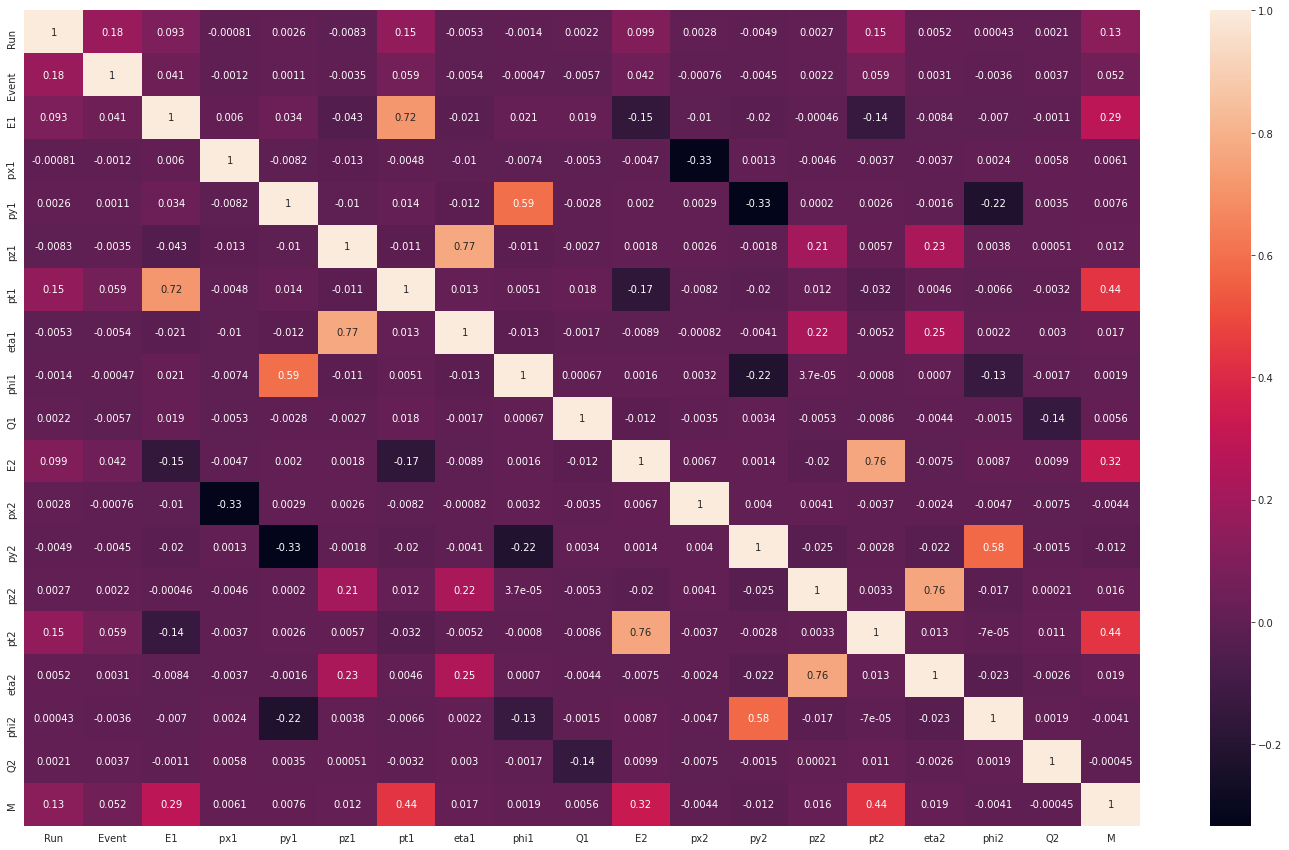

In [8]:
plt.figure(figsize = (25,15))
sb.heatmap(data.corr(),annot = True)


**Run and Invariant M**

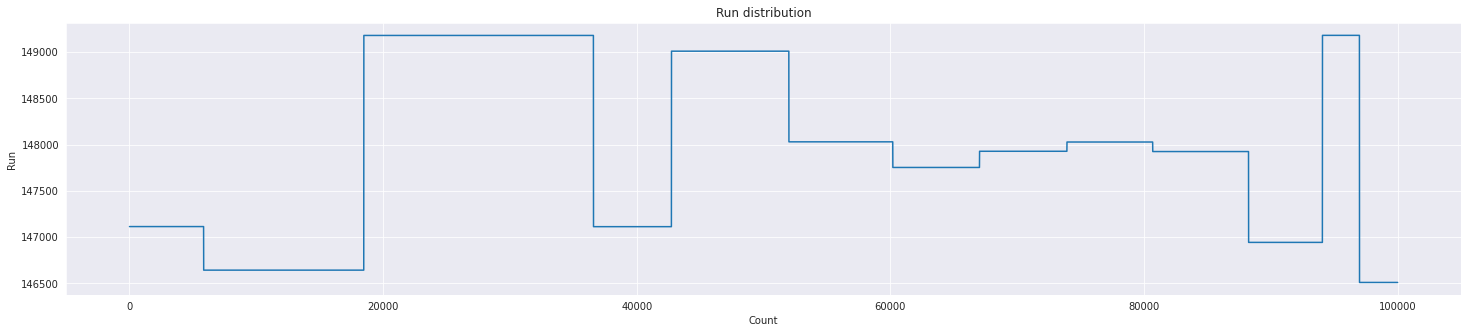

In [9]:
plt.figure(figsize = (25,5))
plt.plot(data['Run'])
plt.xlabel('Count')
plt.ylabel('Run')
plt.title('Run distribution')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'M vs Run')

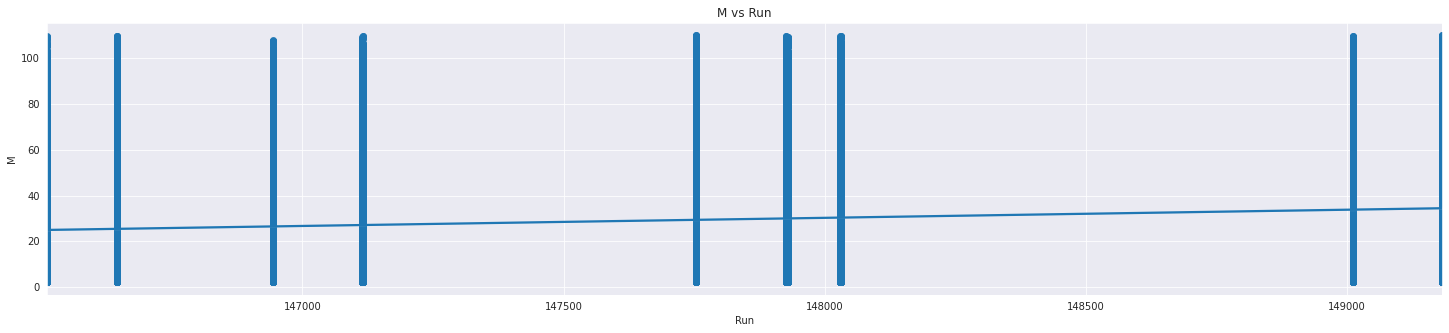

In [10]:
plt.figure(figsize = (25,5))
sb.regplot(data['Run'],data['M'])
plt.title('M vs Run')

* we can see from the regression plot that the electrons whose invariant mass was less was found at lesser runs and the electrons whose invariant mass is more were determined at higher runs

**Evnet and Invariant Mass**

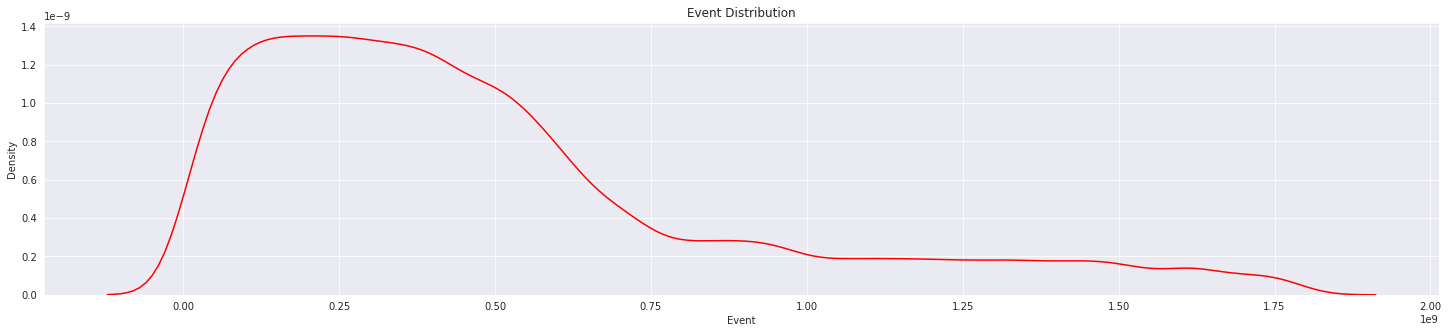

In [11]:
plt.figure(figsize = (25,5))
sb.kdeplot(data['Event'],color = 'red');
plt.title('Event Distribution');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Event', ylabel='M'>

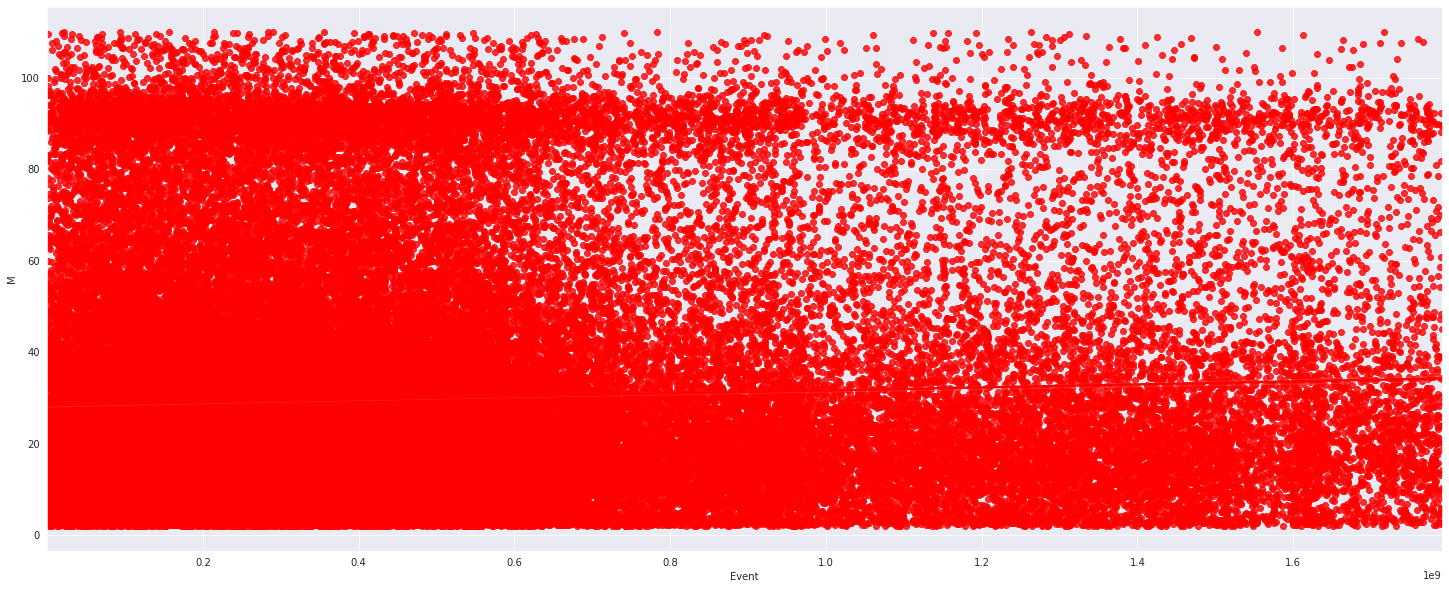

In [12]:
plt.figure(figsize = (25,10))
sb.regplot(data['Event'],data['M'],color = 'red')

* the regression plot is nearly as straight line thus Invariant Mass of electron doesnt depend much on the event

**E1 and Invariant Mass**

Text(0.5, 0, 'E1,E2')

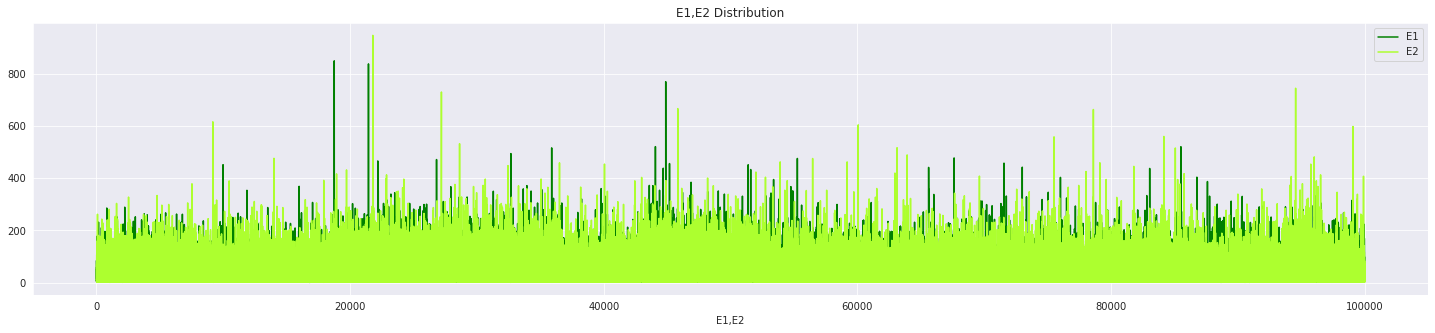

In [13]:
plt.figure(figsize = (25,5))
plt.plot(data['E1'],color = 'green',label = 'E1')
plt.plot(data['E2'],color = 'greenyellow',label = 'E2')
plt.legend()
plt.title('E1,E2 Distribution')
plt.xlabel('E1,E2')


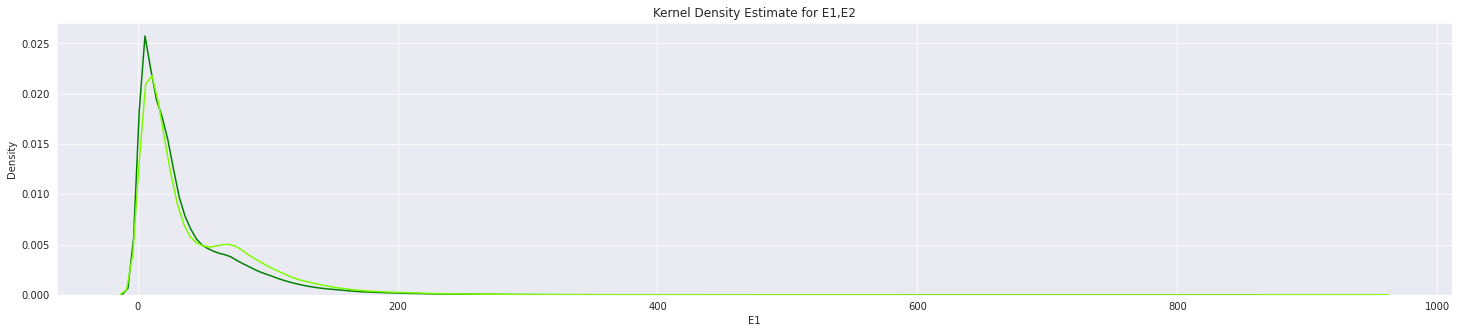

In [14]:
plt.figure(figsize = (25,5))
sb.kdeplot(data['E1'],color = 'green',label = 'E1')
sb.kdeplot(data['E2'],color = 'lawngreen',label = 'E2')
plt.legend
plt.title('Kernel Density Estimate for E1,E2');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'E1 vs M')

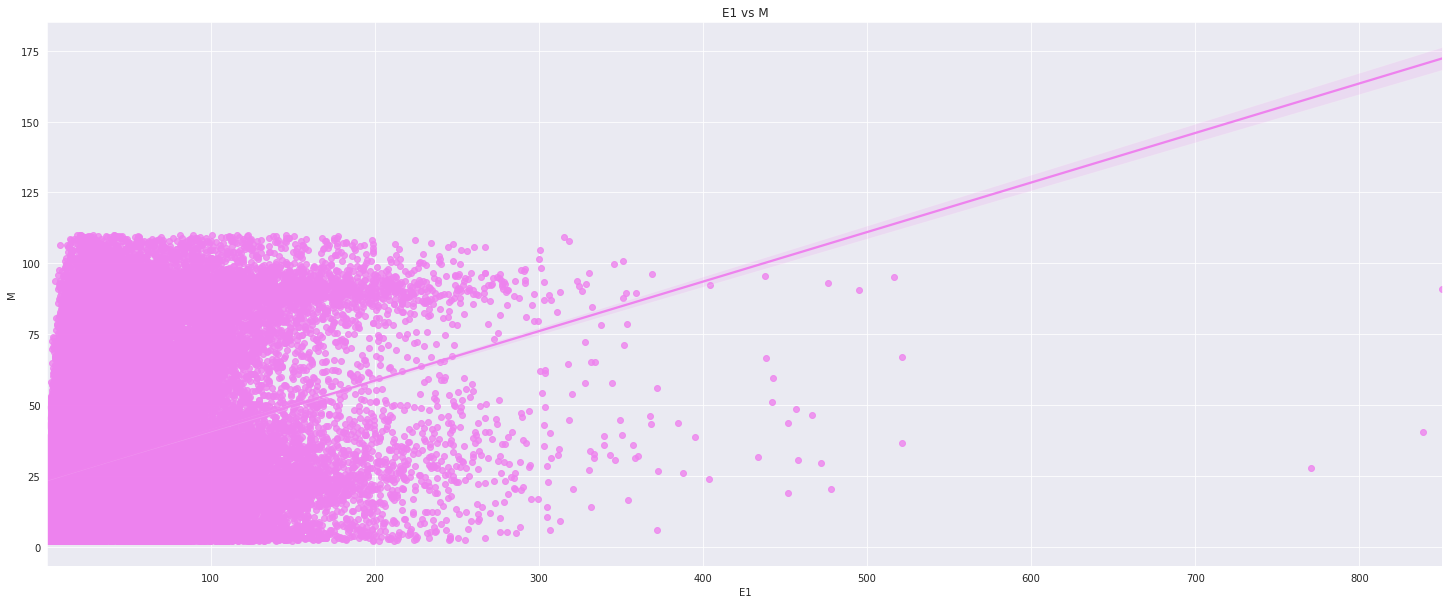

In [15]:
plt.figure(figsize = (25,10))
sb.regplot(data['E1'],data['M'],color = 'violet')
plt.title('E1 vs M')

* As E1 increases invariant mass tends to increase

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'E2 vs M')

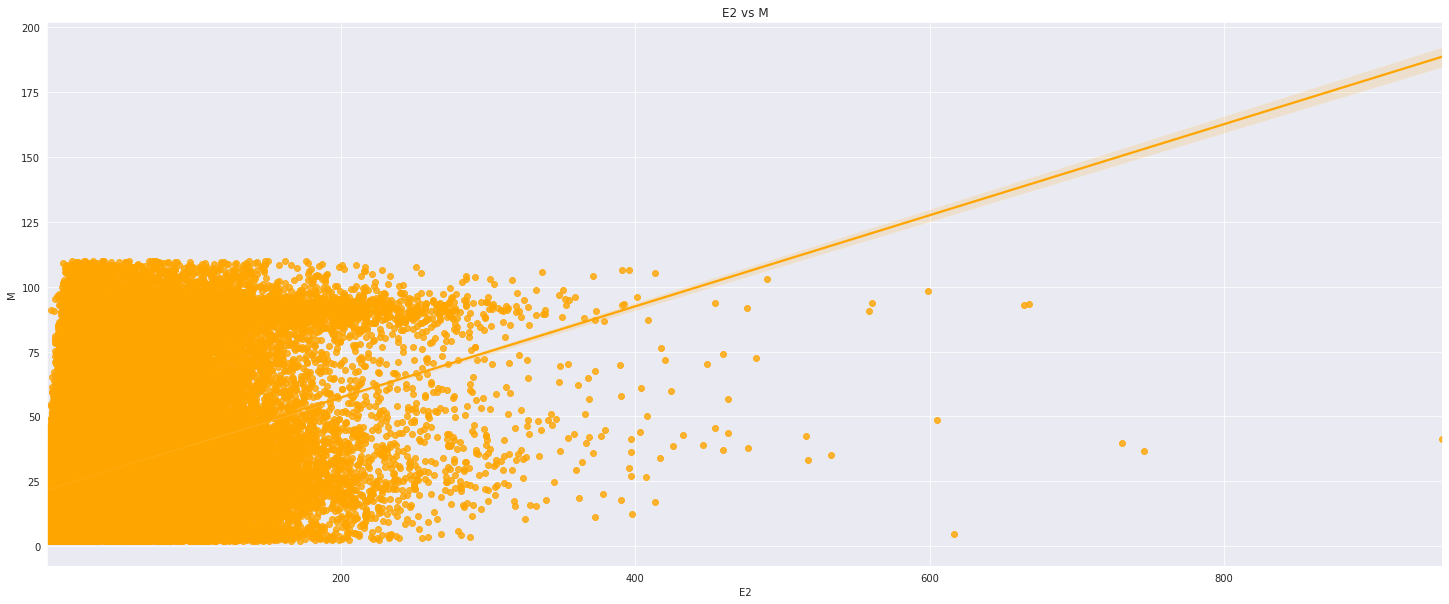

In [16]:
plt.figure(figsize = (25,10))
sb.regplot(data['E2'],data['M'],color = 'orange')
plt.title('E2 vs M')

* As E2 increase Invariant Mass tends to increase

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'E1 vs E2')

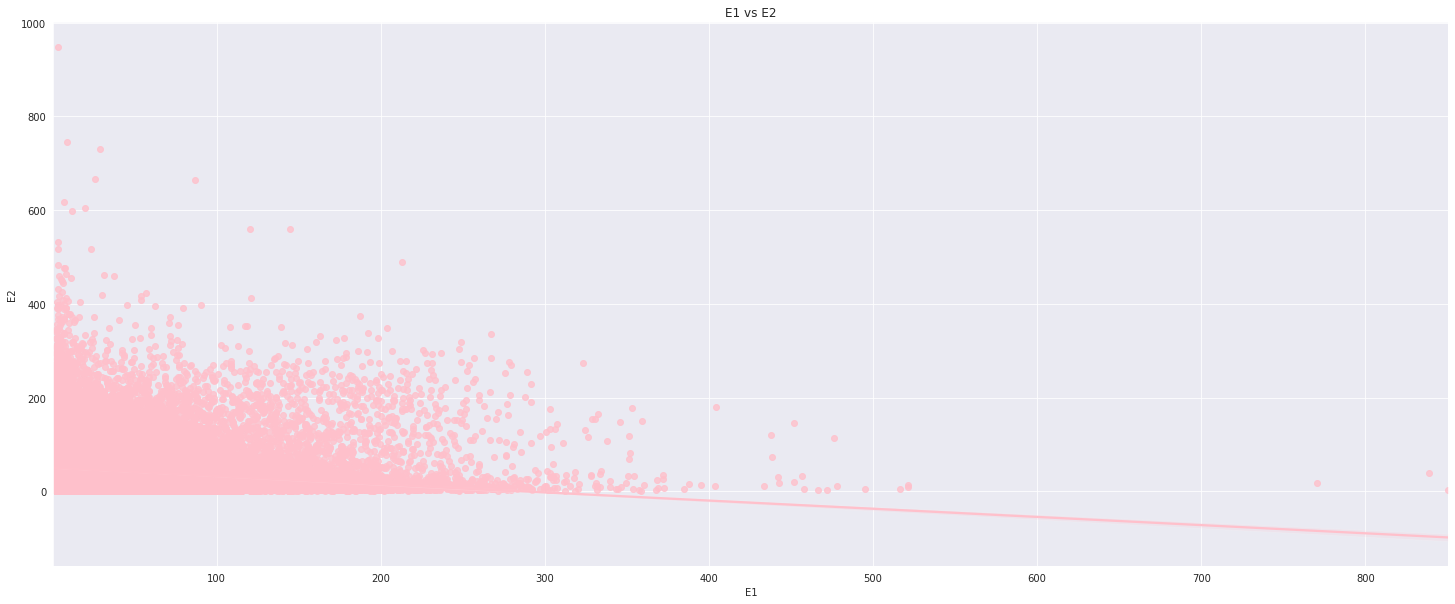

In [17]:
plt.figure(figsize = (25,10))
sb.regplot(data['E1'],data['E2'],color = 'pink')
plt.title('E1 vs E2')

**px1,py1,pz1 and Invariant Mass**

Text(0.5, 1.0, 'pz2')

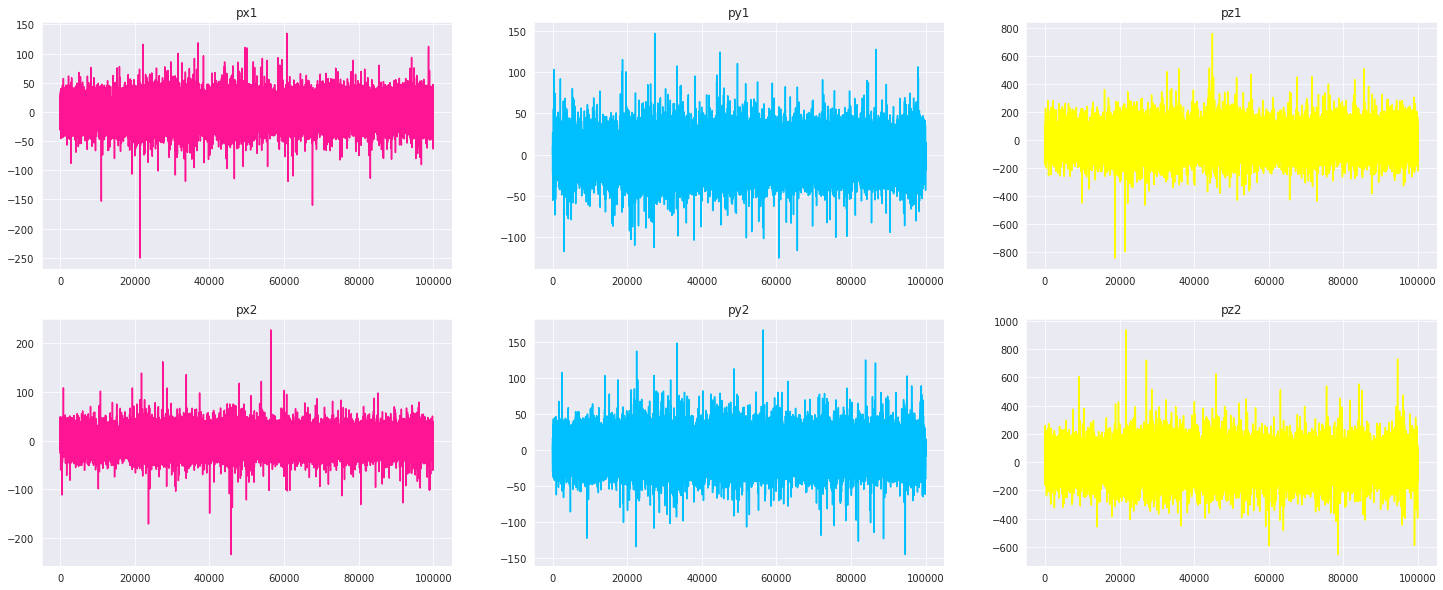

In [18]:
fig,ax = plt.subplots(2,3,figsize = (25,10))
ax[0][0].plot(data['px1 '],color = 'deeppink')
ax[0][0].set_title('px1')
ax[0][1].plot(data['py1'],color = 'deepskyblue')
ax[0][1].set_title('py1')
ax[0][2].plot(data['pz1'],color = 'yellow')
ax[0][2].set_title('pz1')
ax[1][0].plot(data['px2'],color = 'deeppink')
ax[1][0].set_title('px2')
ax[1][1].plot(data['py2'],color = 'deepskyblue')
ax[1][1].set_title('py2')
ax[1][2].plot(data['pz2'],color = 'yellow')
ax[1][2].set_title('pz2')

* The above distribution plot shows the presence of outliers

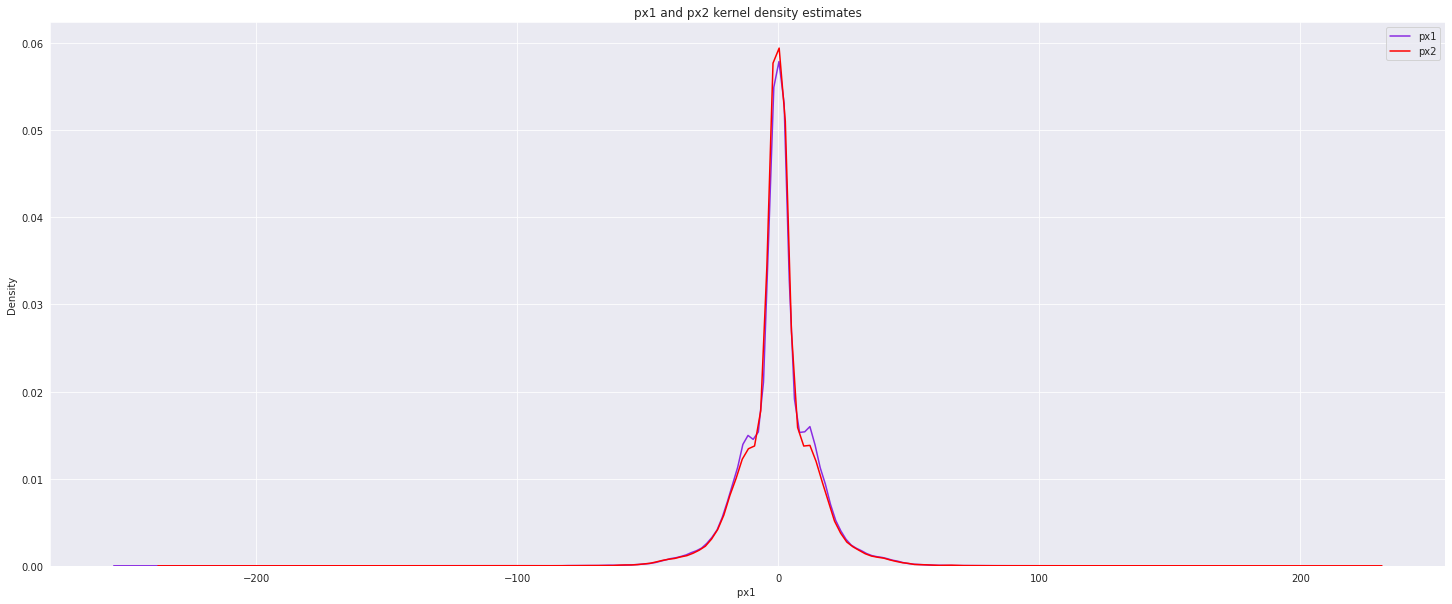

In [19]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['px1 '],color = 'blueviolet',label = 'px1');
sb.kdeplot(data['px2'],color = 'red',label = 'px2');
plt.legend();
plt.title('px1 and px2 kernel density estimates');

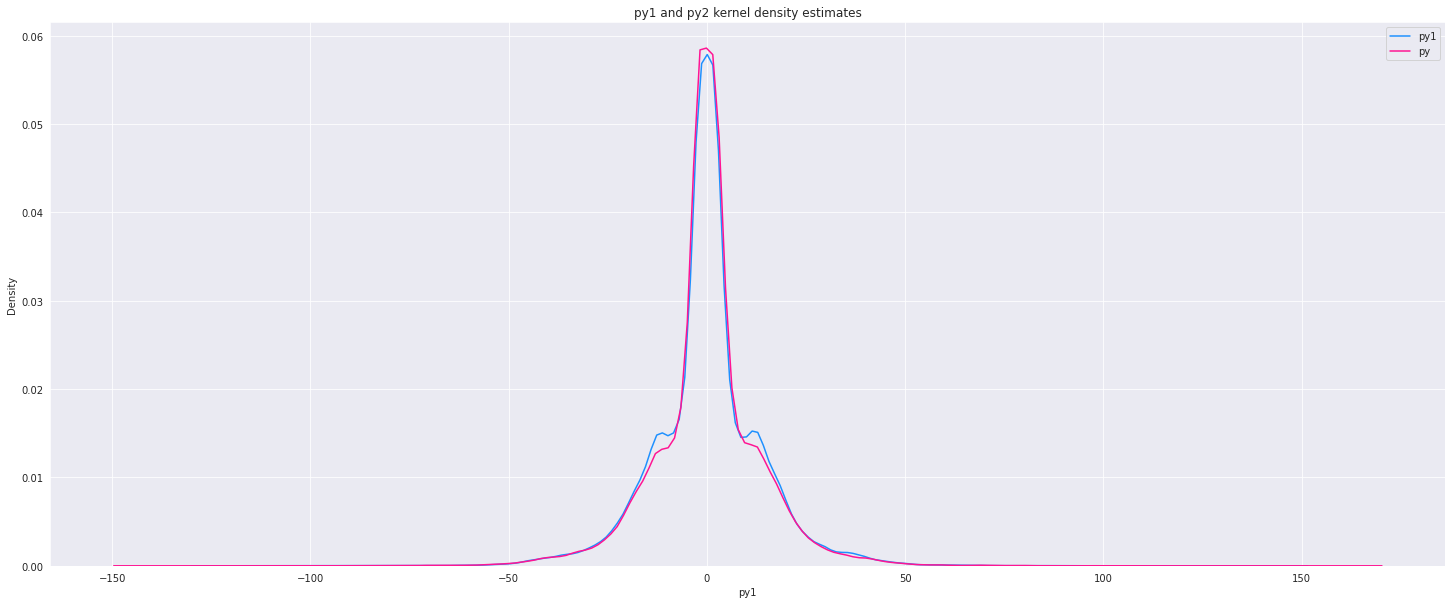

In [20]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['py1'],color = 'dodgerblue',label = 'py1');
sb.kdeplot(data['py2'],color = 'deeppink',label = 'py');
plt.legend();
plt.title('py1 and py2 kernel density estimates');

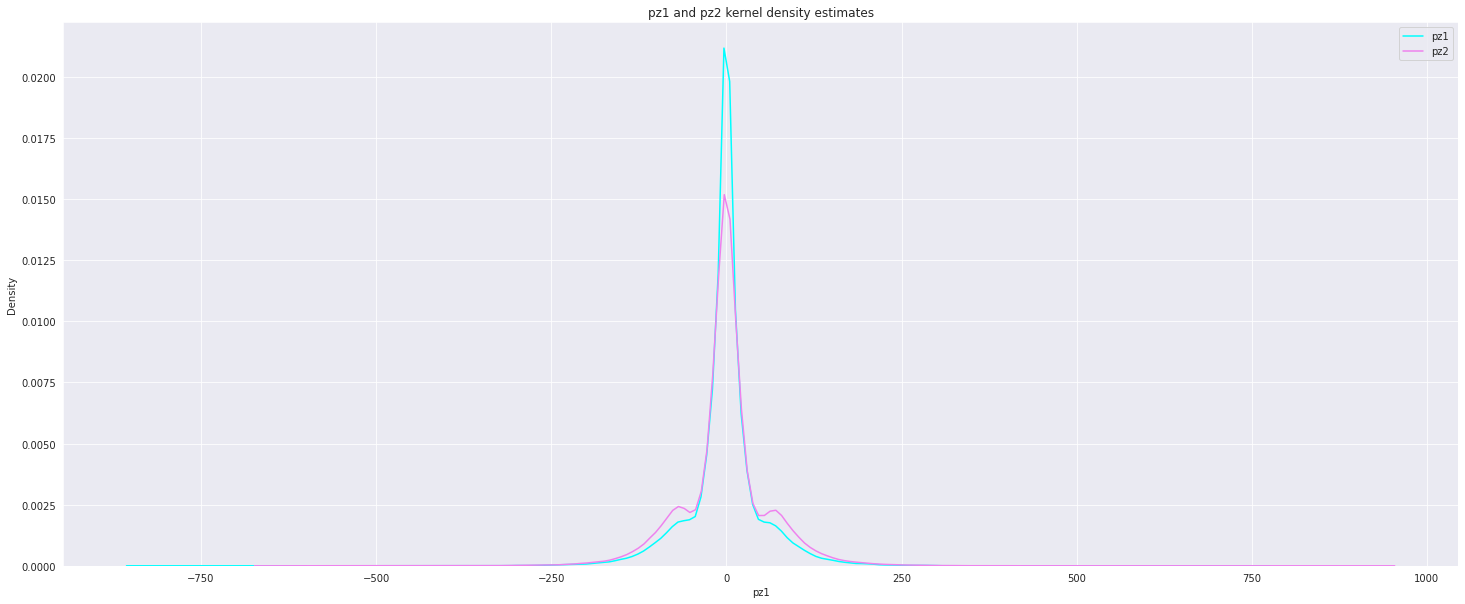

In [21]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['pz1'],color = 'aqua',label = 'pz1');
sb.kdeplot(data['pz2'],color = 'violet',label = 'pz2');
plt.legend();
plt.title('pz1 and pz2 kernel density estimates');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


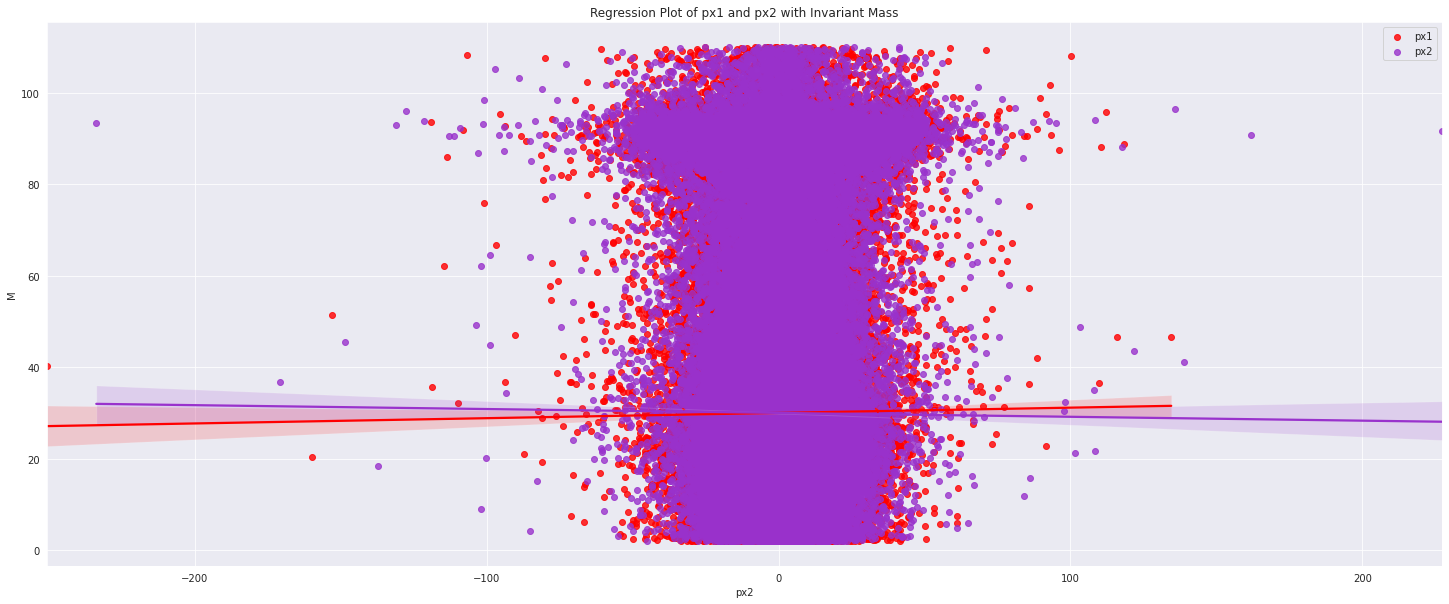

In [22]:
plt.figure(figsize = (25,10))
sb.regplot(data['px1 '],data['M'],color = 'red',label = 'px1')
sb.regplot(data['px2'],data['M'],color = 'darkorchid',label = 'px2')
plt.legend()
plt.title('Regression Plot of px1 and px2 with Invariant Mass')
plt.show()


* As px1 increases Invariant Mass tends to increase slightly
* As px2 increases Invariant Mass tends to decrease slightly

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


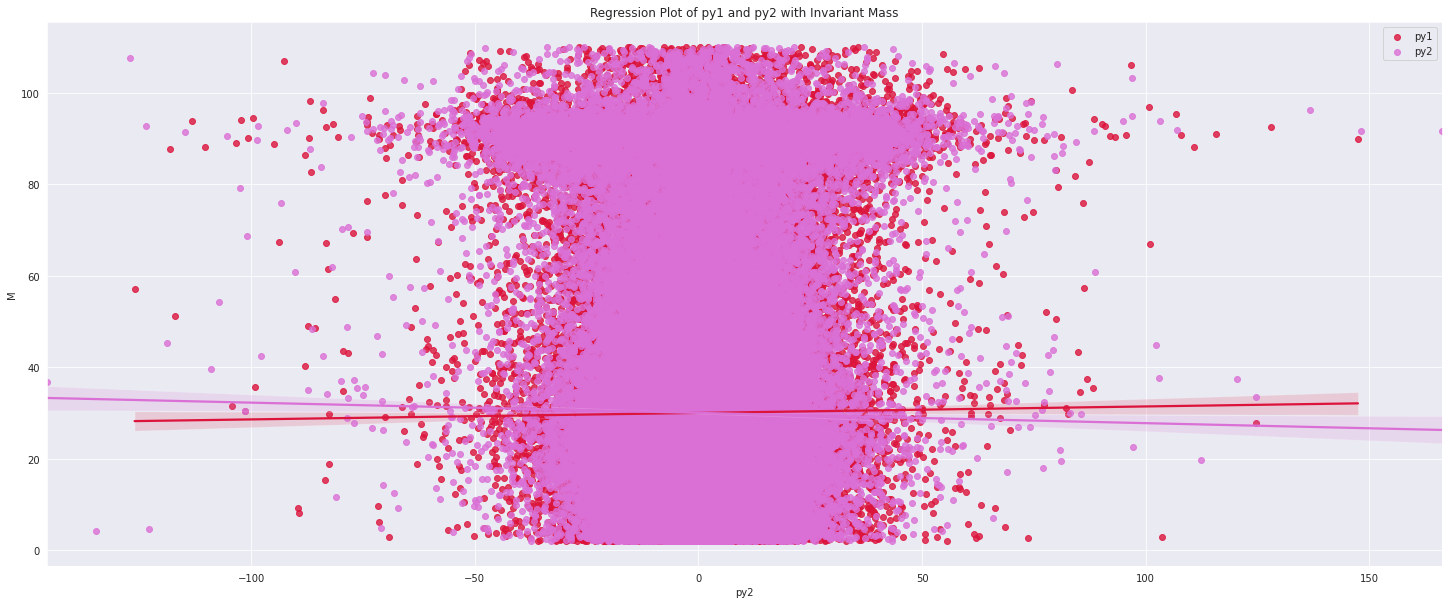

In [23]:
plt.figure(figsize = (25,10))
sb.regplot(data['py1'],data['M'],color = 'crimson',label = 'py1')
sb.regplot(data['py2'],data['M'],color = 'orchid',label = 'py2')
plt.legend()
plt.title('Regression Plot of py1 and py2 with Invariant Mass')
plt.show()

* as py1 increases invariant mass increases
* as py2 increases invariant mass decreases

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


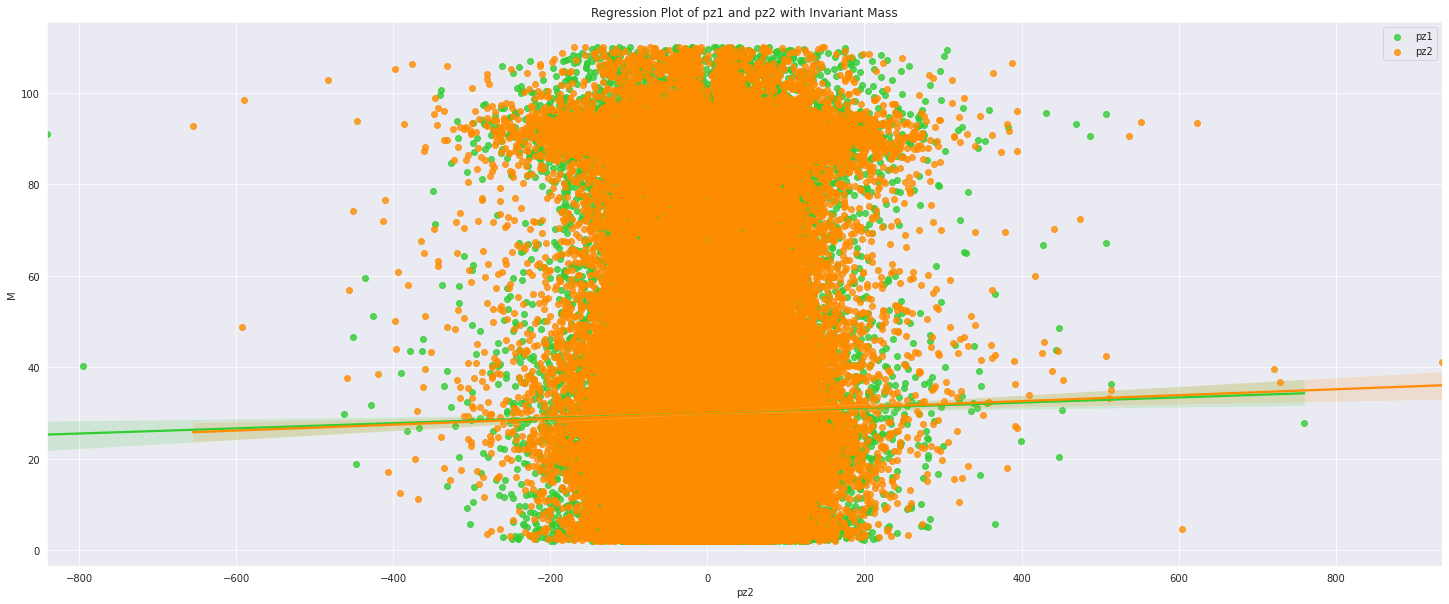

In [24]:
plt.figure(figsize = (25,10))
sb.regplot(data['pz1'],data['M'],color = 'limegreen',label = 'pz1')
sb.regplot(data['pz2'],data['M'],color = 'darkorange',label = 'pz2')
plt.legend()
plt.title('Regression Plot of pz1 and pz2 with Invariant Mass')
plt.show()

* as both pz1 and pz2 increase Invariant Mass tends to increase

**eta1,eta2(psuedorapidity) and Invariant Mass**

Text(0.5, 1.0, 'eta1 and eta2 distribution')

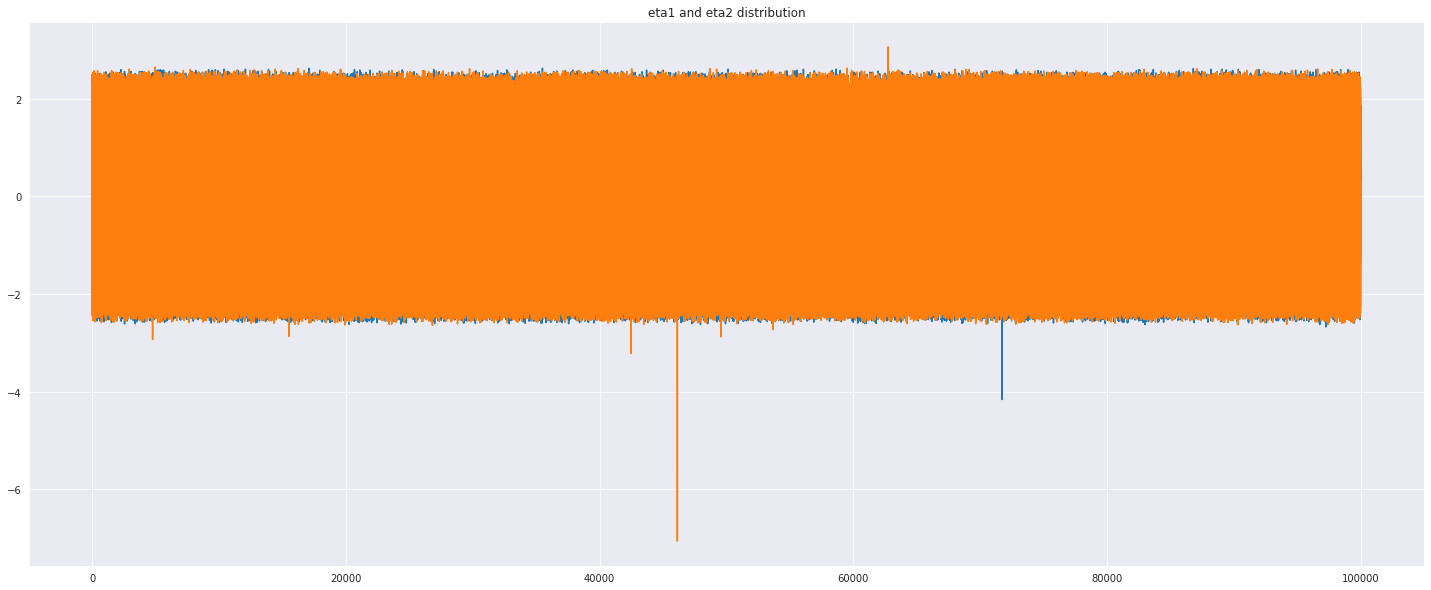

In [25]:
plt.figure(figsize = (25,10))
plt.plot(data['eta1'])
plt.plot(data['eta2'])
plt.title('eta1 and eta2 distribution')


Few outliers present in eta2

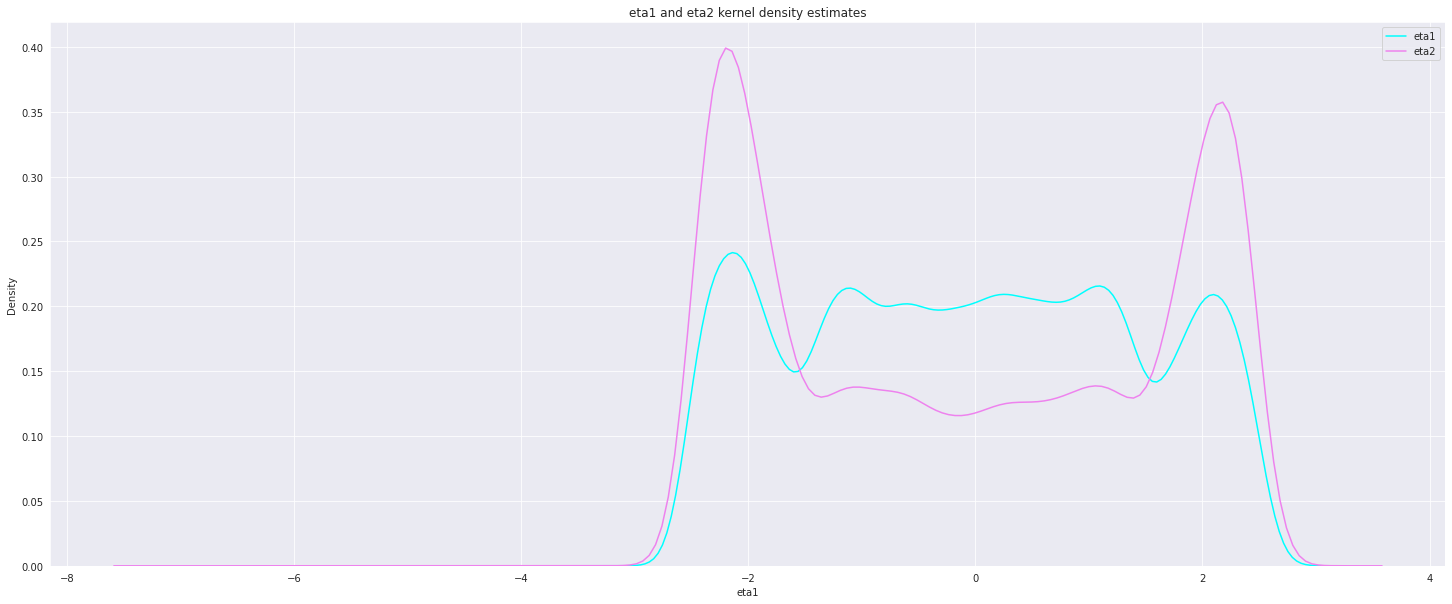

In [26]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['eta1'],color = 'aqua',label = 'eta1');
sb.kdeplot(data['eta2'],color = 'violet',label = 'eta2');
plt.legend();
plt.title('eta1 and eta2 kernel density estimates');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


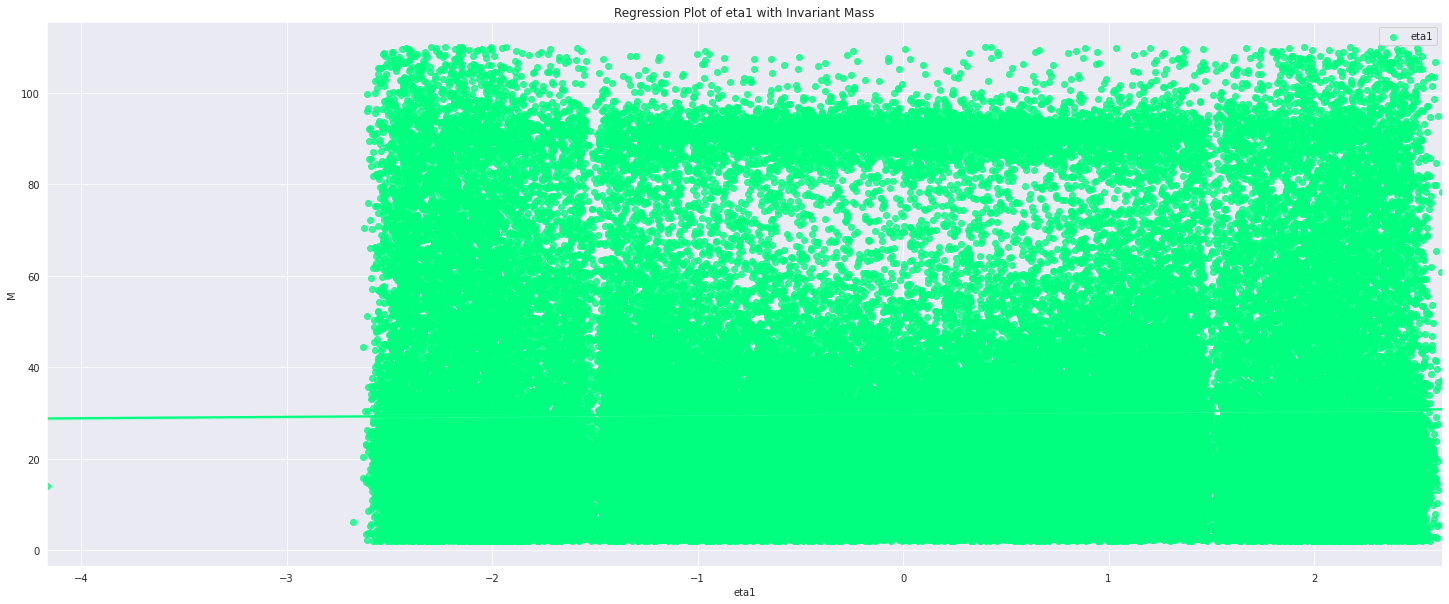

In [27]:
plt.figure(figsize = (25,10))
sb.regplot(data['eta1'],data['M'],color = 'springgreen',label = 'eta1')
plt.legend()
plt.title('Regression Plot of eta1 with Invariant Mass')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='eta2', ylabel='M'>

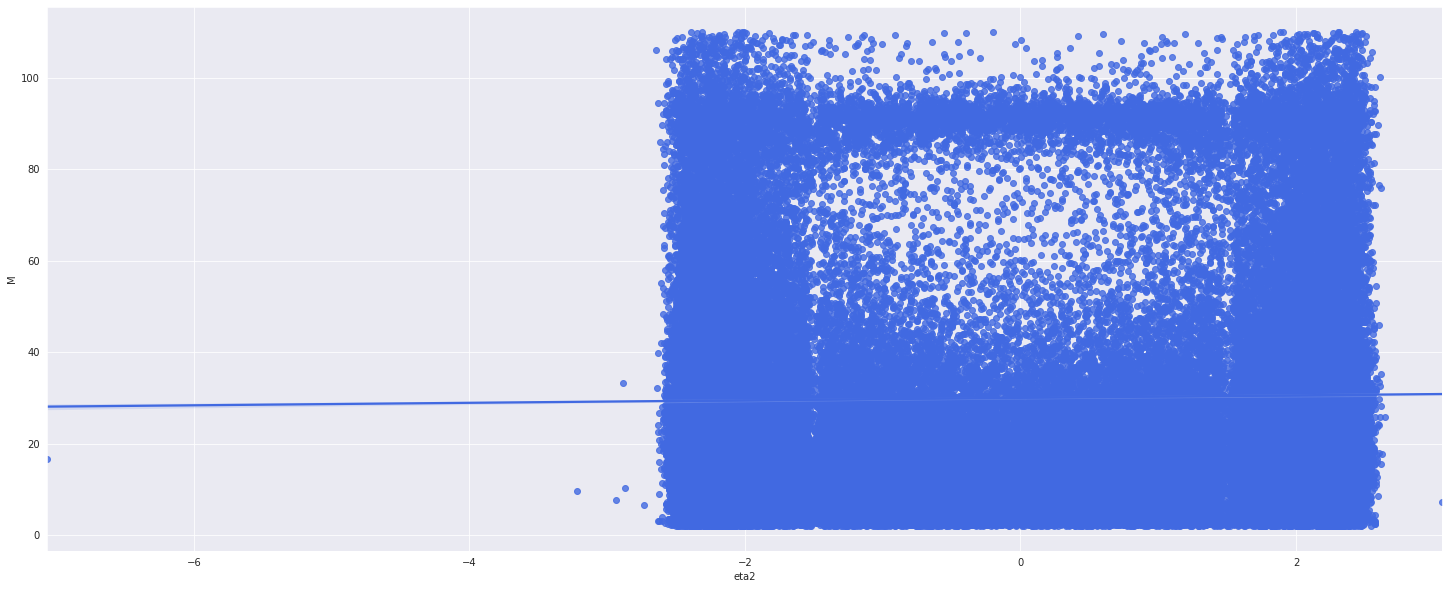

In [28]:
plt.figure(figsize = (25,10))
sb.regplot(data['eta2'],data['M'],color = 'royalblue',label = 'eta2')

* Invariant Mass tends to increase slightly with increase in psuedorapidity

**phi1,phi2 and Invariant Mass**

Text(0.5, 1.0, 'Phi Distribution')

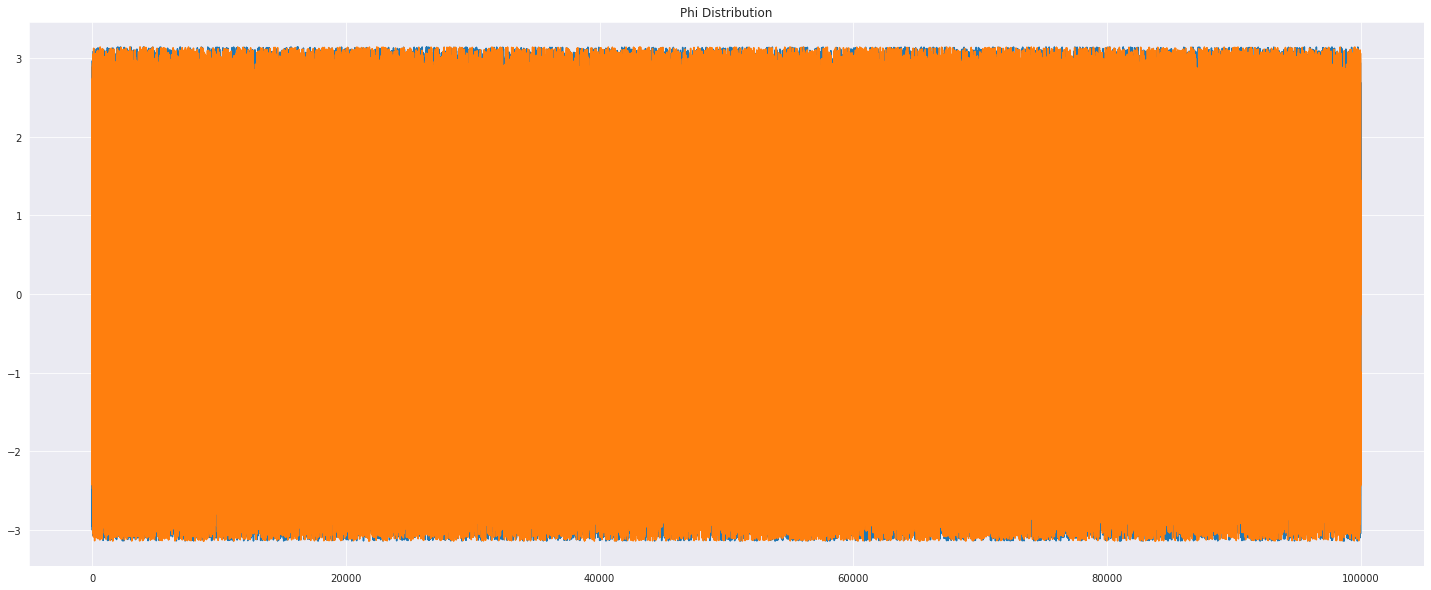

In [29]:
plt.figure(figsize = (25,10))
plt.plot(data['phi1'])
plt.plot(data['phi2'])
plt.title('Phi Distribution')


No visible outliers

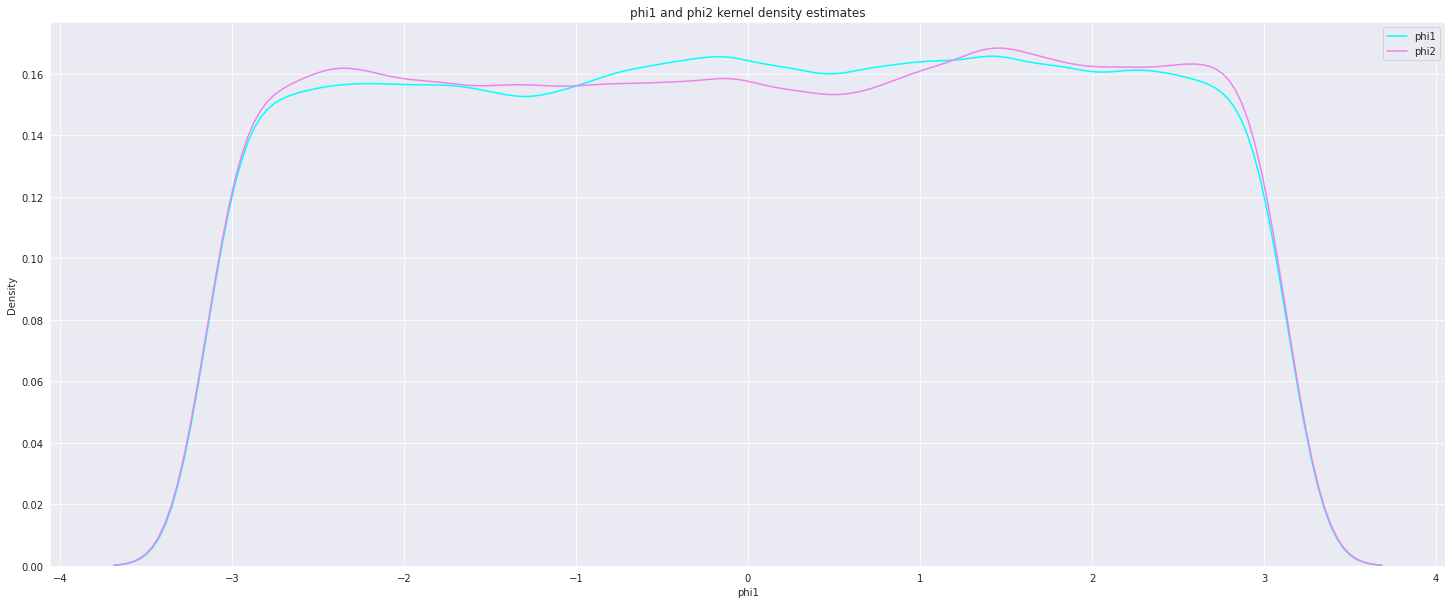

In [30]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['phi1'],color = 'aqua',label = 'phi1');
sb.kdeplot(data['phi2'],color = 'violet',label = 'phi2');
plt.legend();
plt.title('phi1 and phi2 kernel density estimates');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


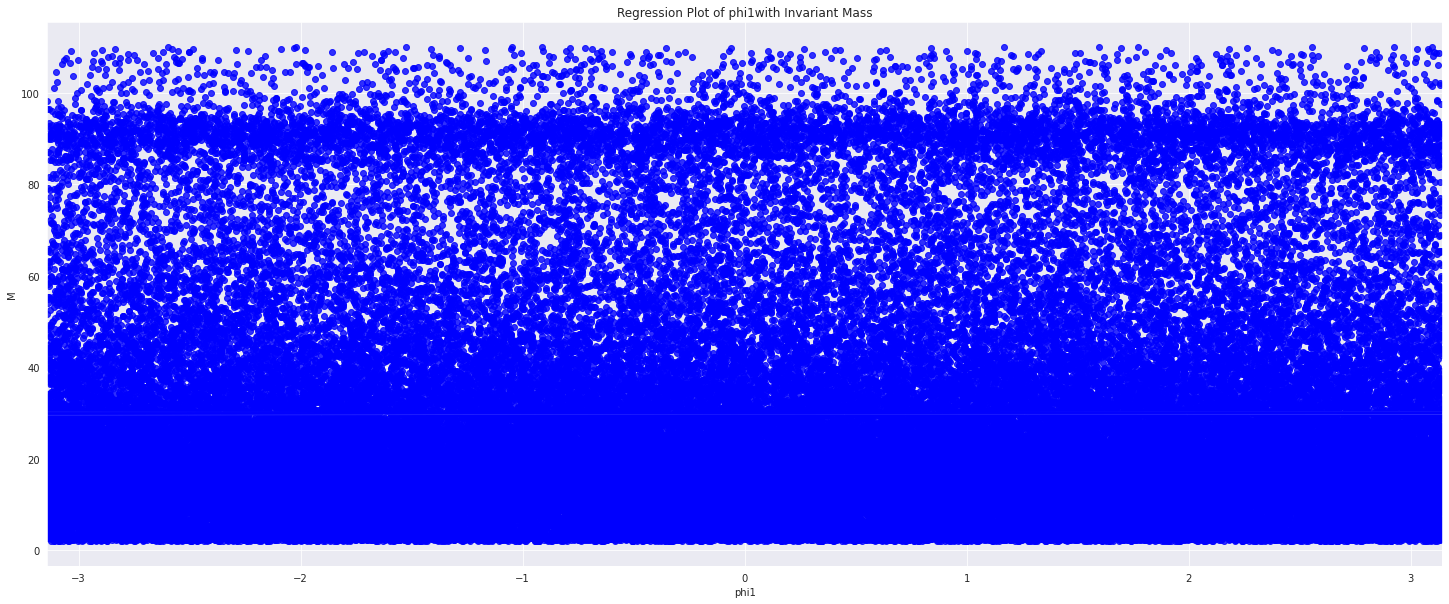

In [31]:
plt.figure(figsize = (25,10))
sb.regplot(data['phi1'],data['M'],color = 'blue',label = 'phi1')
plt.title('Regression Plot of phi1with Invariant Mass')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


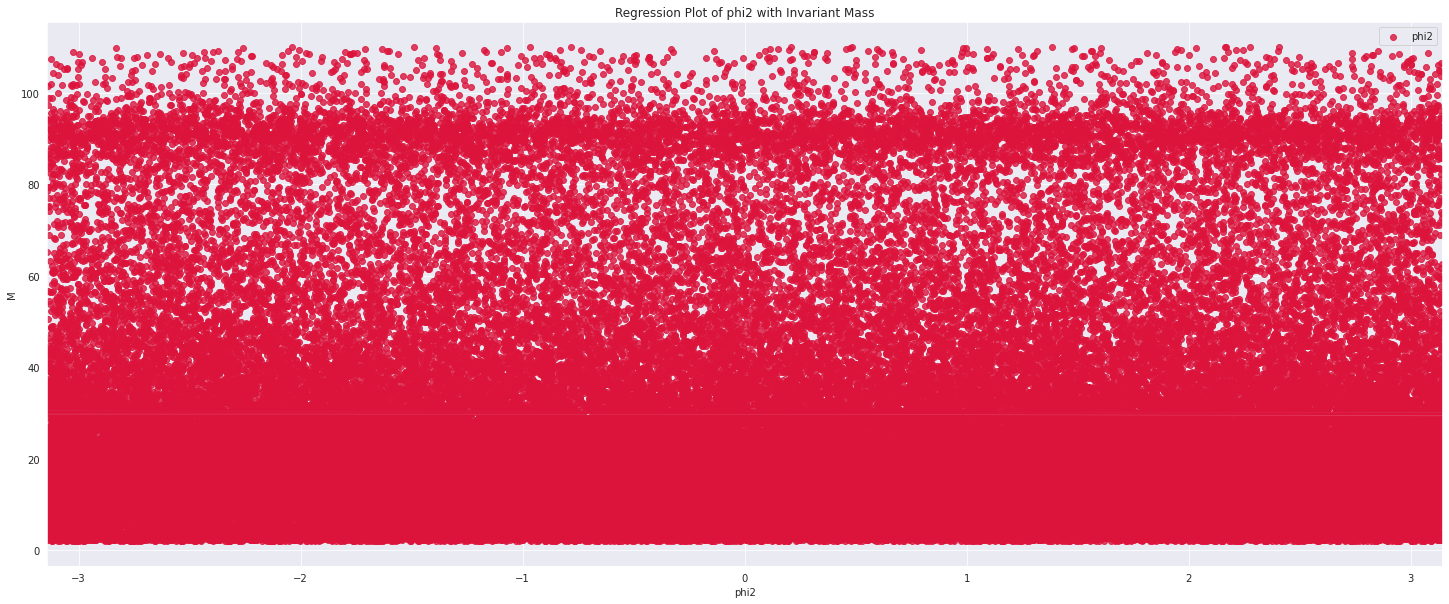

In [32]:
plt.figure(figsize = (25,10))
sb.regplot(data['phi2'],data['M'],color = 'crimson',label = 'phi2')
plt.legend()
plt.title('Regression Plot of phi2 with Invariant Mass')
plt.show()

Regression plots are straight line for phi1 and phi2 thus Invariant Mass doesnt depend much on phi angles

**Charge of electron and Invariant Mass**

<AxesSubplot:xlabel='Q1', ylabel='Density'>

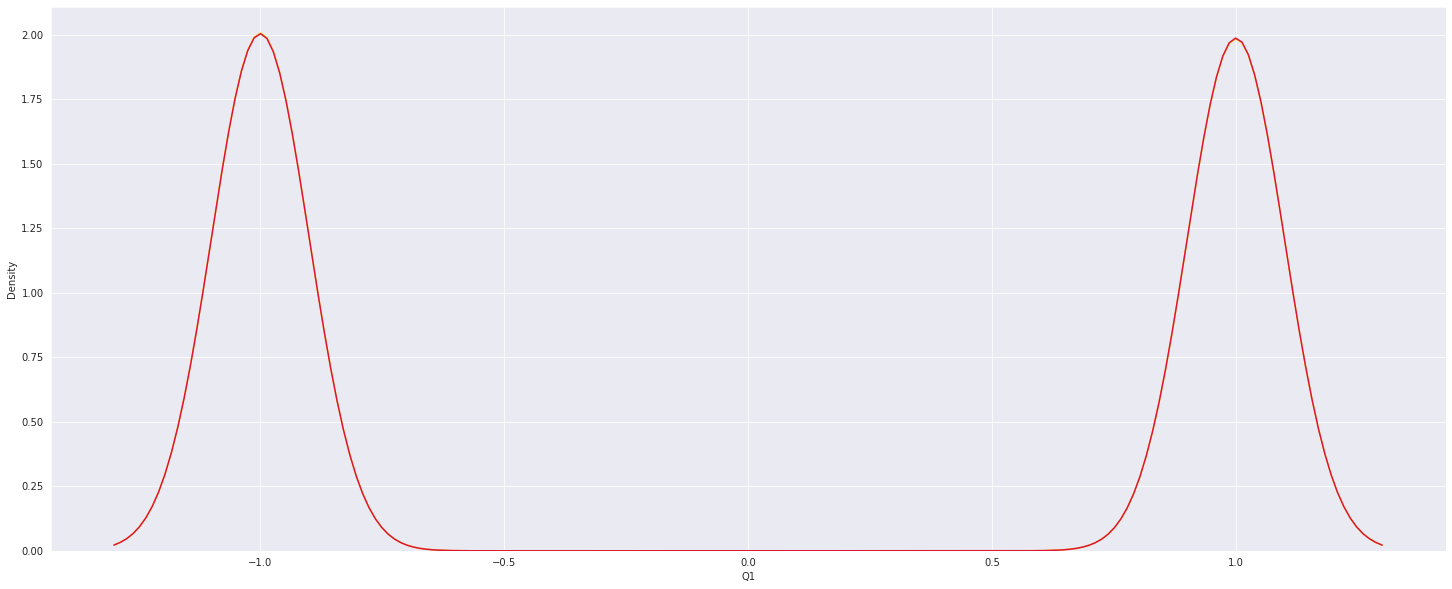

In [33]:
plt.figure(figsize = (25,10))
sb.kdeplot(data['Q1'],color = 'gold')
sb.kdeplot(data['Q2'],color = 'crimson')

No Outliers detected

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


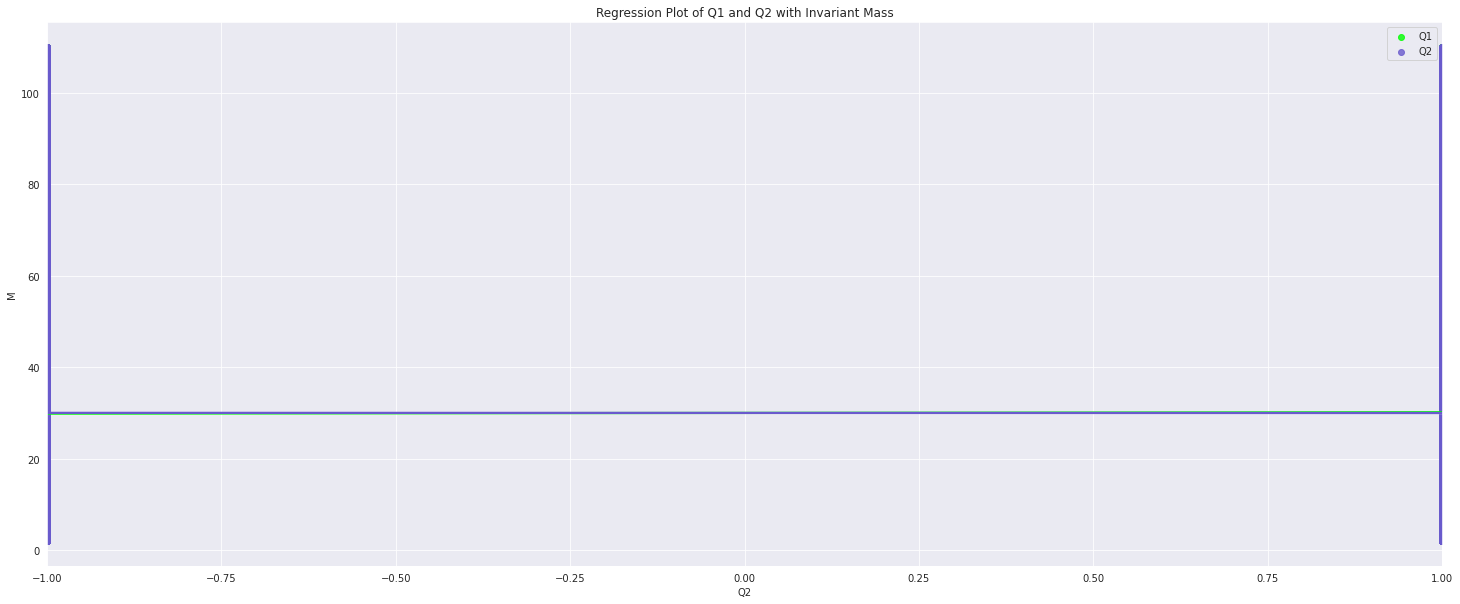

In [34]:
plt.figure(figsize = (25,10))
sb.regplot(data['Q1'],data['M'],color = 'lime',label = 'Q1')
sb.regplot(data['Q2'],data['M'],color = 'slateblue',label = 'Q2')
plt.legend()
plt.title('Regression Plot of Q1 and Q2 with Invariant Mass')
plt.show()

Straight Regression line means Invariant Mass doesnt depend much on Q1 and Q2 directly

# Model for prediction of Invariant Mass of electron

In [35]:
data

Run      Event        E1       px1         py1       pz1       pt1  \
0      147115  366639895  58.71410  -7.311320  10.531000 -57.29740  12.82020   
1      147115  366704169   6.61188  -4.152130  -0.579855  -5.11278   4.19242   
2      147115  367112316  25.54190 -11.480900   2.041680  22.72460  11.66100   
3      147115  366952149  65.39590   7.512140  11.887100  63.86620  14.06190   
4      147115  366523212  61.45040   2.952840 -14.622700 -59.61210  14.91790   
...       ...        ...       ...        ...        ...       ...       ...   
99995  146511  522575834  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996  146511  522786431  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997  146511  522906124   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998  146511  523243830  54.46220  11.352600  11.880900  51.92400  16.43280   
99999  146511  524172389   7.64000   0.886162   5.478900  -5.25033   5.55010   

           eta1      phi1  Q1        E2        px2      py2        pz2  \
0     -2.202670  2.177660   1  11.28360  -1.032340 -1.88066 -11.077800   
1     -1.028420 -3.002840  -1  17.14920 -11.713500  5.04474  11.464700   
2      1.420480  2.965600   1  15.82030  -1.472800  2.25895 -15.588800   
3      2.218380  1.007210   1  25.12730   4.087860  2.59641  24.656300   
4     -2.093750 -1.371540  -1  13.88710  -0.277757 -2.42560 -13.670800   
...         ...       ...  ..       ...        ...      ...        ...   
99995  0.280727  2.690370  -1   1.80181   0.668609 -1.58437   0.537805   
99996 -0.404510  1.092010   1  14.69110  -1.418020 -2.28117 -14.443500   
99997 -0.723075 -3.047630   1  72.81740 -11.074900 -9.28179 -71.369300   
99998  1.867800  0.808132  -1   8.58671   0.378009  3.07828   8.007050   
99999 -0.842662  1.410440   1  52.10880  16.807500 -4.60510  49.108400   

            pt2      eta2      phi2  Q2         M  
0       2.14537 -2.344030 -2.072810  -1   8.94841  
1      12.75360  0.808077  2.734920   1  15.89300  
2       2.69667 -2.455080  2.148570   1  38.38770  
3       4.84272  2.330210  0.565865  -1   3.72862  
4       2.44145 -2.423700 -1.684810  -1   2.74718  
...         ...       ...       ...  ..       ...  
99995   1.71967  0.307851 -1.171470   1   8.44779  
99996   2.68598 -2.383880 -2.126960   1  20.71540  
99997  14.45010 -2.300410 -2.444050  -1  12.71350  
99998   3.10141  1.677170  1.448610   1   4.69670  
99999  17.42700  1.759250 -0.267427  -1  36.50430  

[100000 rows x 19 columns]

In [36]:
sc = StandardScaler()
data['Run'] = sc.fit_transform(data['Run'].values.reshape(-1,1))
data['Event'] = sc.fit_transform(data['Event'].values.reshape(-1,1))

In [37]:
data

Run     Event        E1       px1         py1       pz1       pt1  \
0     -0.891368 -0.319691  58.71410  -7.311320  10.531000 -57.29740  12.82020   
1     -0.891368 -0.319532   6.61188  -4.152130  -0.579855  -5.11278   4.19242   
2     -0.891368 -0.318521  25.54190 -11.480900   2.041680  22.72460  11.66100   
3     -0.891368 -0.318918  65.39590   7.512140  11.887100  63.86620  14.06190   
4     -0.891368 -0.319980  61.45040   2.952840 -14.622700 -59.61210  14.91790   
...         ...       ...       ...        ...        ...       ...       ...   
99995 -1.547675  0.066510  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996 -1.547675  0.067032  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997 -1.547675  0.067328   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998 -1.547675  0.068164  54.46220  11.352600  11.880900  51.92400  16.43280   
99999 -1.547675  0.070464   7.64000   0.886162   5.478900  -5.25033   5.55010   

           eta1      phi1  Q1        E2        px2      py2        pz2  \
0     -2.202670  2.177660   1  11.28360  -1.032340 -1.88066 -11.077800   
1     -1.028420 -3.002840  -1  17.14920 -11.713500  5.04474  11.464700   
2      1.420480  2.965600   1  15.82030  -1.472800  2.25895 -15.588800   
3      2.218380  1.007210   1  25.12730   4.087860  2.59641  24.656300   
4     -2.093750 -1.371540  -1  13.88710  -0.277757 -2.42560 -13.670800   
...         ...       ...  ..       ...        ...      ...        ...   
99995  0.280727  2.690370  -1   1.80181   0.668609 -1.58437   0.537805   
99996 -0.404510  1.092010   1  14.69110  -1.418020 -2.28117 -14.443500   
99997 -0.723075 -3.047630   1  72.81740 -11.074900 -9.28179 -71.369300   
99998  1.867800  0.808132  -1   8.58671   0.378009  3.07828   8.007050   
99999 -0.842662  1.410440   1  52.10880  16.807500 -4.60510  49.108400   

            pt2      eta2      phi2  Q2         M  
0       2.14537 -2.344030 -2.072810  -1   8.94841  
1      12.75360  0.808077  2.734920   1  15.89300  
2       2.69667 -2.455080  2.148570   1  38.38770  
3       4.84272  2.330210  0.565865  -1   3.72862  
4       2.44145 -2.423700 -1.684810  -1   2.74718  
...         ...       ...       ...  ..       ...  
99995   1.71967  0.307851 -1.171470   1   8.44779  
99996   2.68598 -2.383880 -2.126960   1  20.71540  
99997  14.45010 -2.300410 -2.444050  -1  12.71350  
99998   3.10141  1.677170  1.448610   1   4.69670  
99999  17.42700  1.759250 -0.267427  -1  36.50430  

[100000 rows x 19 columns]

In [38]:
data.shape

(100000, 19)

In [39]:
X = data.iloc[:,:18]
y = data['M']

In [40]:
X

Run     Event        E1       px1         py1       pz1       pt1  \
0     -0.891368 -0.319691  58.71410  -7.311320  10.531000 -57.29740  12.82020   
1     -0.891368 -0.319532   6.61188  -4.152130  -0.579855  -5.11278   4.19242   
2     -0.891368 -0.318521  25.54190 -11.480900   2.041680  22.72460  11.66100   
3     -0.891368 -0.318918  65.39590   7.512140  11.887100  63.86620  14.06190   
4     -0.891368 -0.319980  61.45040   2.952840 -14.622700 -59.61210  14.91790   
...         ...       ...       ...        ...        ...       ...       ...   
99995 -1.547675  0.066510  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996 -1.547675  0.067032  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997 -1.547675  0.067328   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998 -1.547675  0.068164  54.46220  11.352600  11.880900  51.92400  16.43280   
99999 -1.547675  0.070464   7.64000   0.886162   5.478900  -5.25033   5.55010   

           eta1      phi1  Q1        E2        px2      py2        pz2  \
0     -2.202670  2.177660   1  11.28360  -1.032340 -1.88066 -11.077800   
1     -1.028420 -3.002840  -1  17.14920 -11.713500  5.04474  11.464700   
2      1.420480  2.965600   1  15.82030  -1.472800  2.25895 -15.588800   
3      2.218380  1.007210   1  25.12730   4.087860  2.59641  24.656300   
4     -2.093750 -1.371540  -1  13.88710  -0.277757 -2.42560 -13.670800   
...         ...       ...  ..       ...        ...      ...        ...   
99995  0.280727  2.690370  -1   1.80181   0.668609 -1.58437   0.537805   
99996 -0.404510  1.092010   1  14.69110  -1.418020 -2.28117 -14.443500   
99997 -0.723075 -3.047630   1  72.81740 -11.074900 -9.28179 -71.369300   
99998  1.867800  0.808132  -1   8.58671   0.378009  3.07828   8.007050   
99999 -0.842662  1.410440   1  52.10880  16.807500 -4.60510  49.108400   

            pt2      eta2      phi2  Q2  
0       2.14537 -2.344030 -2.072810  -1  
1      12.75360  0.808077  2.734920   1  
2       2.69667 -2.455080  2.148570   1  
3       4.84272  2.330210  0.565865  -1  
4       2.44145 -2.423700 -1.684810  -1  
...         ...       ...       ...  ..  
99995   1.71967  0.307851 -1.171470   1  
99996   2.68598 -2.383880 -2.126960   1  
99997  14.45010 -2.300410 -2.444050  -1  
99998   3.10141  1.677170  1.448610   1  
99999  17.42700  1.759250 -0.267427  -1  

[100000 rows x 18 columns]

In [41]:
y

0         8.94841
1        15.89300
2        38.38770
3         3.72862
4         2.74718
           ...   
99995     8.44779
99996    20.71540
99997    12.71350
99998     4.69670
99999    36.50430
Name: M, Length: 100000, dtype: float64

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [43]:
inputs = Input(shape = (18,))
x = inputs
x = Dense(256,activation = 'relu')(x)
x = Dense(512,activation = 'relu')(x)
x = Dense(256,activation = 'relu')(x)
outputs = Dense(1)(x)
model = Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 18)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               4864      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 268,033
Trainable params: 268,033
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer = 'rmsprop',loss = 'mse')

In [45]:
model.fit(X,y,batch_size = 25,epochs = 40)

Epoch 1/40
4000/4000 [==============================] - 8s 2ms/step - loss: 90.2136
Epoch 2/40
4000/4000 [==============================] - 7s 2ms/step - loss: 11.5284
Epoch 3/40
4000/4000 [==============================] - 7s 2ms/step - loss: 7.8894
Epoch 4/40
4000/4000 [==============================] - 7s 2ms/step - loss: 6.1596
Epoch 5/40
4000/4000 [==============================] - 7s 2ms/step - loss: 5.5175
Epoch 6/40
4000/4000 [==============================] - 7s 2ms/step - loss: 4.7229
Epoch 7/40
4000/4000 [==============================] - 7s 2ms/step - loss: 4.0416
Epoch 8/40
4000/4000 [==============================] - 7s 2ms/step - loss: 3.7760
Epoch 9/40
4000/4000 [==============================] - 7s 2ms/step - loss: 3.5340
Epoch 10/40
4000/4000 [==============================] - 7s 2ms/step - loss: 3.2078
Epoch 11/40
4000/4000 [==============================] - 7s 2ms/step - loss: 3.0521
Epoch 12/40
4000/4000 [==============================] - 7s 2ms/step - loss: 2.9386

In [46]:
loss = model.evaluate(X_test,y_test,batch_size = 50)
print('Loss is :',loss)

500/500 [==============================] - 1s 1ms/step - loss: 0.7438
Loss is : 0.7437685132026672


In [47]:
Invariant_mass = model.predict(X_test)

In [48]:
y_test

98451    44.8925
40743    92.8309
67587    32.1134
11431    14.8059
32633    12.8535
          ...   
70487    39.0489
16275    16.2775
4321     33.1233
70393    14.1475
60791    35.0447
Name: M, Length: 25000, dtype: float64

In [49]:
Invariant_mass = np.array(Invariant_mass)

In [50]:
print(Invariant_mass)

[[45.213024]
 [93.107735]
 [32.89084 ]
 ...
 [33.199383]
 [13.882748]
 [34.432747]]


In [51]:
electron = [[-0.891368,-0.319691,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,-1]]
print("Invariant Mass is:",model.predict(electron))

Invariant Mass is: [[9.372622]]
